In [22]:
import pandas as pd

fix_file = "../../../dataset/fix_data.csv"
fix_df = pd.read_csv(fix_file)
fix_df

,qid,question_text,target
0,42b9446db515fcd253a7,What is the qualification for an animator or a...,0
1,bdad704204f8535e313a,Do different flavoured protein shakes have dif...,0
2,d13a0c498bf5a9cb2bc3,How does someone keep their children when they...,0
3,237828efb8348c39f14b,How much time required to learn Bollywood danc...,0
4,3c02e808603faa6ecc20,What skills can I have to fit in formulae one?,0
...,...,...,...
3995,8e636f1fb48158100adc,"In ancient China, there was nothing other than...",1
3996,bffed8f6e8fec61187b5,"I have a 3 inch penis, can I fuck a lot's girls?",1
3997,324670fdf6a9ba5cc019,Are all blacks from Haiti?,1
3998,e74c62301253bbc32563,Why are questions demonizing Israel okay but a...,1


In [23]:
import sys
sys.path.append('../../..')

from preprocessing import preprocessing_text_with_lemma
fix_df['preprocessed_text'] = fix_df['question_text'].apply(preprocessing_text_with_lemma)

In [24]:
X = fix_df['preprocessed_text'].apply(lambda x: ' '.join(x))
y = fix_df['target']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)
print(X_train.shape)
print(X_test.shape)

(3200,)
(800,)


In [26]:
import pickle
with open('y_train_80.pkl', 'wb') as f:
    pickle.dump(y_train, f)
with open('y_test_20.pkl', 'wb') as f:
    pickle.dump(y_test, f)

In [27]:
X_train_list = X_train.tolist()
X_test_list = X_test.tolist()

from TFIDFVectorizer import TFIDF
tfidf_vectorizer = TFIDF(X_train_list)
X_train_tfidf = tfidf_vectorizer.transform_tfidf(X_train_list)
X_test_tfidf = tfidf_vectorizer.transform_tfidf(X_test_list)

In [28]:
from MultinomialWithEvidence import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train, tfidf_vectorizer.idf)
y_pred = mnb.predict(X_test_tfidf)

{0: 0.033, 1: 0.967}
{0: 0.982, 1: 0.018}
{0: 0.994, 1: 0.006}
{0: 0.862, 1: 0.138}
{0: 0.0, 1: 1.0}
{0: 0.884, 1: 0.116}
{0: 0.497, 1: 0.502}
{0: 0.305, 1: 0.695}
{0: 0.488, 1: 0.512}
{0: 0.312, 1: 0.688}
{0: 0.102, 1: 0.898}
{0: 0.204, 1: 0.796}
{0: 0.234, 1: 0.766}
{0: 0.931, 1: 0.069}
{0: 0.952, 1: 0.048}
{0: 0.007, 1: 0.993}
{0: 0.99, 1: 0.01}
{0: 0.967, 1: 0.033}
{0: 0.08, 1: 0.92}
{0: 0.004, 1: 0.996}
{0: 0.697, 1: 0.303}
{0: 0.001, 1: 0.999}
{0: 0.012, 1: 0.988}
{0: 0.005, 1: 0.995}
{0: 0.06, 1: 0.94}
{0: 0.002, 1: 0.998}
{0: 0.012, 1: 0.988}
{0: 0.276, 1: 0.724}
{0: 0.025, 1: 0.975}
{0: 0.001, 1: 0.999}
{0: 0.017, 1: 0.983}
{0: 0.001, 1: 0.999}
{0: 0.994, 1: 0.006}
{0: 0.959, 1: 0.041}
{0: 0.295, 1: 0.705}
{0: 0.651, 1: 0.349}
{0: 0.047, 1: 0.953}
{0: 0.114, 1: 0.886}
{0: 0.453, 1: 0.547}
{0: 0.529, 1: 0.471}
{0: 0.07, 1: 0.93}
{0: 0.021, 1: 0.979}
{0: 0.45, 1: 0.55}
{0: 0.159, 1: 0.841}
{0: 0.46, 1: 0.54}
{0: 0.004, 1: 0.996}
{0: 0.015, 1: 0.985}
{0: 0.012, 1: 0.988}
{0: 0.56

In [29]:
y_pred_label = ["Sincere" if label == 0 else "Insincere" for label in y_pred]
predicted_data = {"Question": X_test_list, "Target": y_pred_label}
predicted_df = pd.DataFrame(predicted_data)
predicted_df.to_csv('predicted_data_20.csv', index=True)

In [30]:
TP_datas = [0] * len(y_pred)
TN_datas = [0] * len(y_pred)
FP_datas = [0] * len(y_pred)
FN_datas = [0] * len(y_pred)

y_test_list = y_test.tolist()
y_test_list_label = ["Sincere" if label == 0 else "Insincere" for label in y_test_list]

for i in range(len(y_pred)):
    if y_pred[i] == 0 and y_test_list[i] == 0:
        TP_datas[i] = 1
    elif y_pred[i] == 0 and y_test_list[i] == 1:
        FP_datas[i] = 1
    elif y_pred[i] == 1 and y_test_list[i] == 1:
        TN_datas[i] = 1
    elif y_pred[i] == 1 and y_test_list[i] == 0:
        FN_datas[i] = 1

scenario_result = {
    "Actual": y_test_list_label,
    "Prediction": y_pred_label,
    "TP": TP_datas,
    "TN": TN_datas,
    "FP": FP_datas,
    "FN": FN_datas
}

scenario_result_df = pd.DataFrame(scenario_result)
scenario_result_df.to_csv("scenario_result_20.csv", index=True)

In [31]:
import pickle
with open('x_train_tfidf_80.pkl', 'wb') as f:
    pickle.dump(X_train_tfidf, f)

In [32]:
import pickle
with open('x_test_tfidf_20.pkl', 'wb') as f:
    pickle.dump(X_test_tfidf, f)

In [33]:
import pickle
with open('mnb_20.pkl', 'wb') as f:
    pickle.dump(mnb, f)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Confusion Matrix:")
cf = confusion_matrix(y_test, y_pred)
print(cf)

print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=['Sincere', 'Insincere'])
print(report)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[296 112]
 [ 30 362]]

Classification Report:
              precision    recall  f1-score   support

     Sincere       0.91      0.73      0.81       408
   Insincere       0.76      0.92      0.84       392

    accuracy                           0.82       800
   macro avg       0.84      0.82      0.82       800
weighted avg       0.84      0.82      0.82       800


Accuracy: 0.82


In [35]:
accuracy = round(accuracy, 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)

performance_score = [accuracy, precision, recall, f1]

import pickle
with open('performance_score_20.pkl', 'wb') as f:
    pickle.dump(performance_score, f)

In [36]:
import pickle
with open('confusion_matrix_20.pkl', 'wb') as f:
    pickle.dump(cf, f)

In [37]:
import pickle

with open('confusion_matrix_20.pkl', 'rb') as f:
    cf_matrix = pickle.load(f)

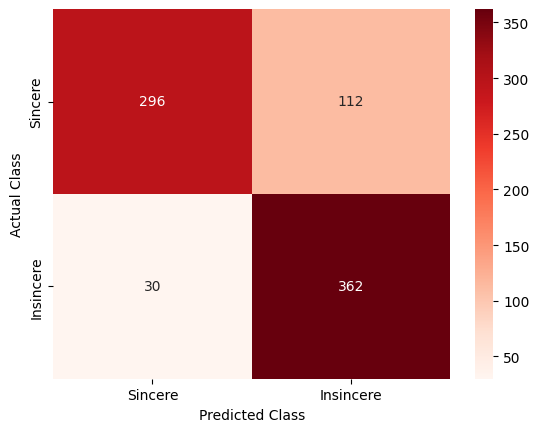

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cf_matrix,cmap= "Reds", 
            annot = True, 
            fmt='', 
            xticklabels = ['Sincere','Insincere'], 
            yticklabels = ['Sincere','Insincere'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.show()

In [39]:
import numpy as np

sincere_train = np.sum(y_train == 0)
insincere_train = np.sum(y_train == 1)

sincere_test = np.sum(y_test == 0)
insincere_test = np.sum(y_test == 1)

print("Jumlah data Sincere dalam data pelatihan:", sincere_train)
print("Jumlah data Insincere dalam data pelatihan:", insincere_train)

print("Jumlah data Sincere dalam data pengujian:", sincere_test)
print("Jumlah data Insincere dalam data pengujian:", insincere_test)

Jumlah data Sincere dalam data pelatihan: 1592
Jumlah data Insincere dalam data pelatihan: 1608
Jumlah data Sincere dalam data pengujian: 408
Jumlah data Insincere dalam data pengujian: 392


Sincere:  408
Insincere:  392


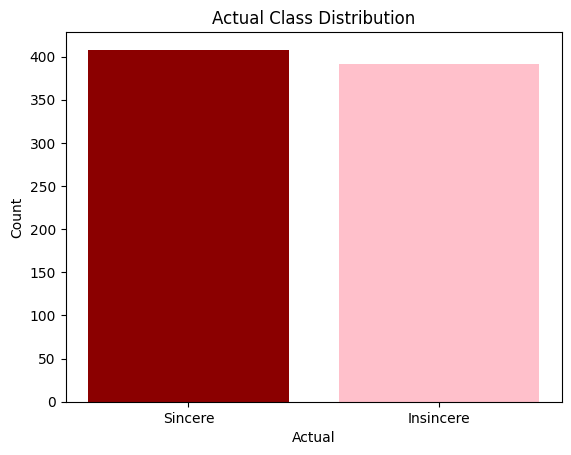

In [40]:
import matplotlib.pyplot as plt

# Data
categories = ['Sincere', 'Insincere']
values = [sincere_test, insincere_test]
colors = ['darkred', 'pink']  # Define colors for each category

print("Sincere: ", sincere_test)
print("Insincere: ", insincere_test)

# Create bar plot with different colors for each category
plt.bar(categories, values, color=colors)

# Add title and labels
plt.title('Actual Class Distribution')
plt.xlabel('Actual')
plt.ylabel('Count')

# Show plot
plt.show()

Sincere:  326
Insincere:  474


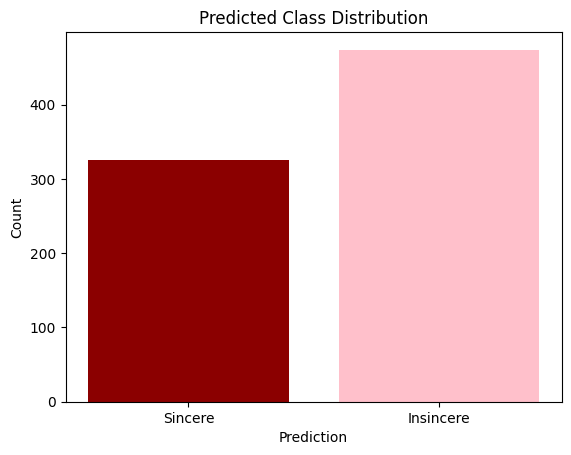

In [41]:
import matplotlib.pyplot as plt


total_sincere_prediction = cf[0, 0] + cf[1, 0] 
total_insincere_prediction = cf[1, 1] + cf[0, 1] 

print("Sincere: ", total_sincere_prediction)
print("Insincere: ", total_insincere_prediction)

# Data
categories = ['Sincere', 'Insincere']
values = [total_sincere_prediction, total_insincere_prediction]
colors = ['darkred', 'pink']  # Define colors for each category

# Create bar plot with different colors for each category
plt.bar(categories, values, color=colors)

# Add title and labels
plt.title('Predicted Class Distribution')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Show plot
plt.show()

In [42]:
sorted_likelihood_sincere = sorted(mnb.likelihood[0])
sorted_likelihood_insincere = sorted(mnb.likelihood[1])

top_5_likelihood_sincere = sorted_likelihood_sincere[:5]
top_5_likelihood_insincere = sorted_likelihood_insincere[:5]

n = len(mnb.likelihood[0])
for i in range(n):
    for j in range(0, n-i-1):
        if mnb.likelihood[0][j] < mnb.likelihood[0][j+1]:
            # Swap elements if they are in the wrong order
            mnb.likelihood[0][j], mnb.likelihood[0][j+1] = mnb.likelihood[0][j+1],  mnb.likelihood[0][j]